# Analysis of Titanic Passengers 
> The Titanic Data provides us with the insights on the details on the passengers travelling aboard The Titanic and the no. of survivors. 
The main question that can be answered is what are the factors that would have played role in the survival of the passenger.

## Loading the necessary libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. *Loading the titanic_data.csv file in the notebook*

In [2]:
file = "C:\\Users\\####\\Titanic Data.csv"
titanic_data = pd.read_csv(file)

### Getting an insight on the data by printing the first few entries

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Explanation of the columns of the above dataframe
**The Following information is obtained from [Kaggle](https://www.kaggle.com/c/titanic/data)**
> ### Data Dictionary

| Serial No. | Variable | Definition                                 | Key                                            |
|------------|----------|--------------------------------------------|------------------------------------------------|
| 1          | Survived | Survival                                   | 0 = No, 1 = Yes                                |
| 2          | Pclass   | Ticket class                               | 1 = First, 2 = Second, 3 = Third               |
| 3          | Sex      | Sex                                        |                                                |
| 4          | Age      | Age in years                               |                                                |
| 5          | SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| 6          | Parch    | # of parents / children aboard the Titanic |                                                |
| 7          | Ticket   | Ticket number                              |                                                |
| 8          | Fare     | Passenger fare                             |                                                |
| 9          | Cabin    | Cabin number                               |                                                |
| 10         | Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |
-----------------------------------------------------------------------------------------------------------------------------

*The markdown table was generated using source : [Table generator](http://www.tablesgenerator.com/markdown_tables#)*

**Variable Notes**

>__*pclass*__: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>__*age*__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>__*sibsp*__: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>__*parch*__: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Posing the Problem
> **The main question that can be answered is what factors would have played role in the survival of the passenger aboard the Titanic.**
Looking at the data, the main factors that would have played role are the passenger class, sex, age. 

## Variable Selection for analysis
> So, my three __*Primary Variable*__ choices to answer the question are:
1. Passenger Class
2. Passenger Sex
3. Passenger Age

> The __*Secondary Variables*__ choices to analyze are:
1. Family Size on board (Family_members variable is added in later part).
2. City to which the Passenger belonged (Station of Embarking).

> __*The other variables that could have played a vital role in the survival is the **Passenger's Cabin**, but as the blueprint of the the ship isn't available in the data, to analyse whether the passengers, whose cabins lied near the life boats had a better chance of survival, I wouldn't be analysing that factor.*__


# 2. *Data Wrangling*
> First we will look for the missing data points

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


> Looking at the above information, it is observed that the **age, cabin and embarked** variables are missing entries.

> ### _Analysis of missing "Embarked" Variable._

In [5]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Looking at the Passengers number from all the three Embarkation Cities.

In [6]:
print(titanic_data[titanic_data['Pclass'] == 1].groupby(['Sex','Embarked']).size())

Sex     Embarked
female  C           43
        Q            1
        S           48
male    C           42
        Q            1
        S           79
dtype: int64


> ### Consclusion: 
> **_As most of the Female Passengers who survived were from Southampton, and the Data is only missing for 2 entries, the EMBARKED variable can be filled with "S" for both the entries as they were travelling in the same cabin, and it is most probable that they embarked from same city._**

In [7]:
# substituting "S" for both the missing entries.
titanic_data['Embarked'].fillna("S", inplace = True)

>### _Analysis of missing "Age" Variable._
> The __Age__ variable has many missing entries and the filling the appropriate entry is crucial here.

> The age variable can be filled in ways:
1. Analysing for the **Embarkation** point and finding the mean age of the passengers boarded from that city.
2. Considering the mean age of the survived passengers and perished passengers and filling the corresponding age for missing entries.
3. The choice incorporated by me is the mean age by grouping the **Passenger's Class** and **Gender**.

In [8]:
'''Now Filling in the missing age variable'''

mean_age = titanic_data.groupby(["Pclass", "Sex"])["Age"].mean()
def missing_age(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Pclass'], row['Sex']]
    else:
        return row['Age']
titanic_data['Age'] = titanic_data.apply(missing_age, axis = 1)

> ### __*The "SibSp" and "Parch" variables can be clubbed in a single variable "Family members" which would be the addition of the two variables. As there is no value missing in the "SibSp" and "Parch" varables, simple vector addition can be performed using the "+" operator.*__

In [9]:
# Clubbing the Siblings and Parent/Child Variable together in new variable "Family Members."
titanic_data['Family members'] = titanic_data['SibSp'] + titanic_data['Parch']

> ### Analysis of the missing _Cabin Variable_
> The _Cabin_ variable is missing in most of the entries. The Cabin variable could be important in analysis as the cabin location near/far from the lifeboats could play an important role in the Survival, but as the blueprint of the Ship isn't available, therefore, I won't be analysing this variable, so it is deleted from the original dataset to ease the analysis.
> ###  I won't be analysing the *Ticket*, *Fare*,  variables, so these variables are deleted from the Original Dataset to make the data look more clean.
> The **Sibsp** and **Parch** variables are also removed by adding another variable incorporating the two variables together in **Family Members.**

In [10]:
# Deleting the CABIN variable, along with the TICKET, FARE, PASSENGERID columns.
titanic_data.drop(['Cabin', 'Ticket', 'Fare','SibSp','Parch'], axis = 1, inplace= True)

## Cleaning the Data
> Changing the values in the dataframe with more suitable substitutions and printing out the final data for analysis.
1. The **Suvived** Variable is mapped as **0** to **False** and **1** to **True.**
2. The **Pclass** variable is mapped as **1** to **First**, **2** to **Second** and **3** to **Third.**
3. The **Embarked** variable is mapped as **S** to **Southampton**, **C** to **Cherbourg** and **Q** to **Queenstown.**

In [11]:
survived = {0: False, 1: True}
pclass = {1: "First", 2: "Second", 3: "Third"}
embarked = {"S": "Southampton", "C": "Cherbourg", "Q":"Queenstown"}
def clean_data(row):
    row['Survived'] = survived[row['Survived']]
    row['Pclass'] = pclass[row['Pclass']]
    row['Embarked'] = embarked[row['Embarked']]
    return row
final_titanic_data = titanic_data.apply(clean_data, axis = 1)


### A look at the cleaned final data

In [12]:
final_titanic_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family members
0,1,False,Third,"Braund, Mr. Owen Harris",male,22.000000,Southampton,1
1,2,True,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,Cherbourg,1
2,3,True,Third,"Heikkinen, Miss. Laina",female,26.000000,Southampton,0
3,4,True,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,Southampton,1
4,5,False,Third,"Allen, Mr. William Henry",male,35.000000,Southampton,0
5,6,False,Third,"Moran, Mr. James",male,26.507589,Queenstown,0
6,7,False,First,"McCarthy, Mr. Timothy J",male,54.000000,Southampton,0
7,8,False,Third,"Palsson, Master. Gosta Leonard",male,2.000000,Southampton,4


# 3. *Data Analysis*
> So, my three __*Primary Variable*__ choices to answer the question are:
1. Passenger Class
2. Passenger Sex
3. Passenger Age

> The __*Secondary Variables*__ choices to analyze are:
1. Family Size on board (Family_members variable is added in later part).
2. City to which the Passenger belonged (Station of Embarking).

## Did the *Socio-Economic Class* play role in deciding the survival of the passenger?
> It is analysed by plotting the survivors and non-survivors for each class, that is, "First", "Second", "Third".

First Class
No. of passengers = 216
No. of survivors = 136
Percentage of survivors = 62.96%

Second Class
No. of passengers = 184
No. of survivors = 87
Percentage of survivors = 47.28%

Third Class
No. of passengers = 491
No. of survivors = 119
Percentage of survivors = 24.24%


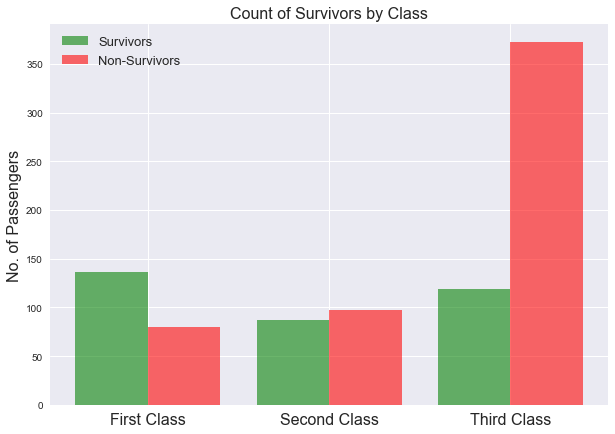

In [13]:
%matplotlib inline
# First Class Passengers
first_class_passengers = final_titanic_data[final_titanic_data['Pclass'] == 'First']
first_class_survivors = first_class_passengers[first_class_passengers['Survived'] == True]
first_class_non_survivors = first_class_passengers[first_class_passengers['Survived'] == False]

# Second Class Passengers
second_class_passengers = final_titanic_data[final_titanic_data['Pclass'] == 'Second']
second_class_survivors = second_class_passengers[second_class_passengers['Survived'] == True]
second_class_non_survivors = second_class_passengers[second_class_passengers['Survived'] == False]

# Third Class Passengers
third_class_passengers = final_titanic_data[final_titanic_data['Pclass'] == 'Third']
third_class_survivors = third_class_passengers[third_class_passengers['Survived'] == True]
third_class_non_survivors = third_class_passengers[third_class_passengers['Survived'] == False]

survivors = np.array([len(first_class_survivors), len(second_class_survivors), len(third_class_survivors)])
non_survivors = np.array([len(first_class_non_survivors), len(second_class_non_survivors), len(third_class_non_survivors)])

print("First Class")
print('No. of passengers = {}'.format(len(first_class_passengers)))
print('No. of survivors = {}'.format(len(first_class_survivors)))
print('Percentage of survivors = {}%'.format(round(len(first_class_survivors)/len(first_class_passengers)*100, 2)))
print()
print("Second Class")
print('No. of passengers = {}'.format(len(second_class_passengers)))
print('No. of survivors = {}'.format(len(second_class_survivors)))
print('Percentage of survivors = {}%'.format(round(len(second_class_survivors)/len(second_class_passengers)*100, 2)))
print()
print("Third Class")
print('No. of passengers = {}'.format(len(third_class_passengers)))
print('No. of survivors = {}'.format(len(third_class_survivors)))
print('Percentage of survivors = {}%'.format(round(len(third_class_survivors)/len(third_class_passengers)*100, 2)))


# Plotting the values
N = 3
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.bar(ind, survivors, width, color = 'g', alpha = 0.58)
plot2 = plt.bar(ind + width, non_survivors, width, color = 'r', alpha = 0.58)
ax.set_ylabel('No. of Passengers', fontsize = 16)
ax.set_title('Count of Survivors by Class', fontsize = 16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('First Class', 'Second Class', 'Third Class'), fontsize = 16)
ax.legend((plot1[0], plot2[0]), ('Survivors', 'Non-Survivors'), fontsize = 13)
plt.show()

## Observation
1. It is clear from the Bar-Graph and from the Stats too that the **First Class** passengers were preferred more over other class Passengers, **Second class** and **Third class**, with an approx. 63% as compared to 47% and 24% resp.
2. The percentage from the third class is the least with mere 24.23 percent.
3. But the number of survivors are close to each other shows that comparable number of person were chosen from each Class.

> ### Result : As per my analysis, what I propose is that the First Class passengers were preferred in the beginning of the rescue operation as they have the most number but as the Third Class Passengers were at a much greater majority and being neglected would have created an outrage amongst them, that made the officials choose them in the latter part of the operation. In this process the Second Class Passengers with the least number would have been neglected even though they have a significant survival percentage. 

## Did the *Gender* play role in deciding the survival of the passenger?
> It is analysed by plotting the survivors and non-survivors for both **Men** and **Women**.

Female Passengers
No. of passengers = 314
No. of survivors = 233
Survival Percentage = 74.2%

Male Passengers
No. of passengers = 577
No. of survivors = 109
Survival Percentage = 18.89%


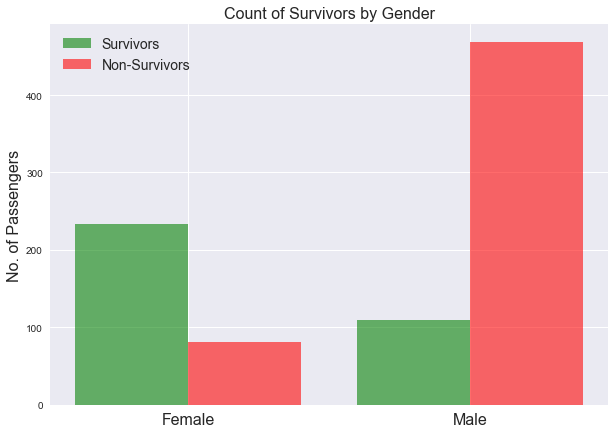

In [14]:
# Female Passengers
female_passengers = final_titanic_data[final_titanic_data['Sex'] == 'female']
female_survivors = female_passengers[female_passengers['Survived'] == True]
female_non_survivors = female_passengers[female_passengers['Survived'] == False]

# Male Passengers
male_passengers = final_titanic_data[final_titanic_data['Sex'] == 'male']
male_survivors = male_passengers[male_passengers['Survived'] == True]
male_non_survivors = male_passengers[male_passengers['Survived'] == False]

survivors = np.array([len(female_survivors), len(male_survivors)])
non_survivors = np.array([len(female_non_survivors), len(male_non_survivors)])

print("Female Passengers")
print('No. of passengers = {}'.format(len(female_passengers)))
print('No. of survivors = {}'.format(len(female_survivors)))
print('Survival Percentage = {}%'.format(round(len(female_survivors)/len(female_passengers)*100, 2)))
print()
print("Male Passengers")
print('No. of passengers = {}'.format(len(male_passengers)))
print('No. of survivors = {}'.format(len(male_survivors)))
print('Survival Percentage = {}%'.format(round(len(male_survivors)/len(male_passengers)*100, 2)))

# Plotting the values
N = 2
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.bar(ind, survivors, width, color = 'g', alpha = 0.58)
plot2 = plt.bar(ind + width, non_survivors, width, color = 'r', alpha = 0.58)
ax.set_ylabel('No. of Passengers', fontsize = 16)
ax.set_title('Count of Survivors by Gender', fontsize = 16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female', 'Male'), fontsize = 16)
ax.legend((plot1[0], plot2[0]), ('Survivors', 'Non-Survivors'), fontsize = 14)
plt.show()

## Observation
1. It is clear from the Bar-Graph and from the Stats too that the **Female** passengers were preferred more over **Male**   Passengers, with an approx. 74% survival rate as compared to 18% for males.
2. The Male passengers were in much greater number of 577 as sompared to Female Passengers who were a total of 314. But number of female passengers who survived were 233 as compared to 109 for males.

> ### Result : Female passengers were chosen first, over males.

## Did the *Age* play role in deciding the survival of the passenger?

Stats about the Age of Passengers

Total number of Passengers = 891
Total number of survivors = 342

Oldest Passenger on board = 80.0
Oldest Passenger to survive = 80.0
Youngest Passenger on board = 0.42
Youngest Passenger to survive = 0.42

Mean Age of Passengers = 29.32
Mean Age of Survivors = 28.18


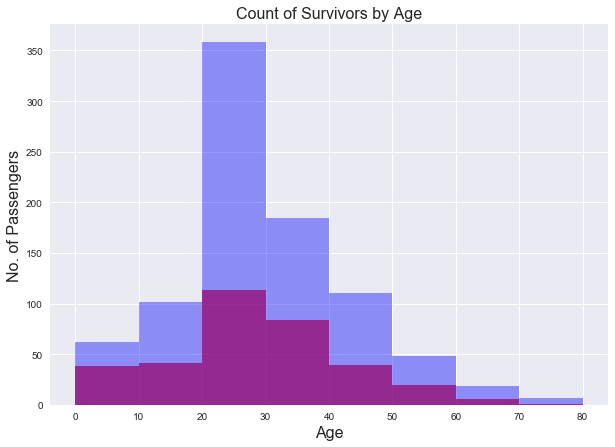

In [15]:
# Age Data
all_age_group = np.array(final_titanic_data['Age'])

# Survivors Data
survivors = final_titanic_data[final_titanic_data['Survived'] == True]
survivors_age_group = np.array(survivors['Age'])

print('Stats about the Age of Passengers')
print()
print('Total number of Passengers = {}'.format(len(all_age_group)))
print('Total number of survivors = {}'.format(len(survivors_age_group)))
print()
print('Oldest Passenger on board = {}'.format(max(all_age_group)))
print('Oldest Passenger to survive = {}'.format(max(survivors_age_group)))
print('Youngest Passenger on board = {}'.format(min(all_age_group)))
print('Youngest Passenger to survive = {}'.format(min(survivors_age_group)))
print()
print('Mean Age of Passengers = {}'.format(round(np.mean(all_age_group), 2)))
print('Mean Age of Survivors = {}'.format(round(np.mean(survivors_age_group), 2)))


# Plotting
fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.hist(survivors_age_group, color = 'r', alpha = 0.7, bins = range(0, 81, 10))
plot2 = plt.hist(all_age_group, color = 'b', alpha = 0.4, bins = range(0, 81, 10))
plt.ylabel('No. of Passengers', fontsize = 16)
plt.title('Count of Survivors by Age', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.show()

## Observation
1. The most of the passengers on board were adults belonging to the age group of 20-40 Years.
2. The people above and below 40 years and 30 years of age respectively, were considerably same in number as from the Graph.
3. The Age group of 20-40 Years were most of the survivors as seen from the graph with the number being most for 20-30 Years, which is approximately 115, out of 342 total survivors.

>### Result : Age did play role in survival.

## Age and Socio-Economic Class Correlation
> The analysis here includes whether the gender choice was uniform among all the classes or for a particular class. So i'll be just considering the data for survivied passengers.

First Class
Number of Survivors = 136
Number of Female Survivors = 91, Percentage = 66.91%
Number of Male Survivors = 45, Percentage = 33.09%

Second Class
Number of Survivors = 87
Number of Female Survivors = 70, Percentage = 80.46%
Number of Male Survivors = 17, Percentage = 19.54%

Third Class
Number of Survivors = 119
Number of Female Survivors = 72, Percentage = 60.5%
Number of Male Survivors = 47, Percentage = 39.5%



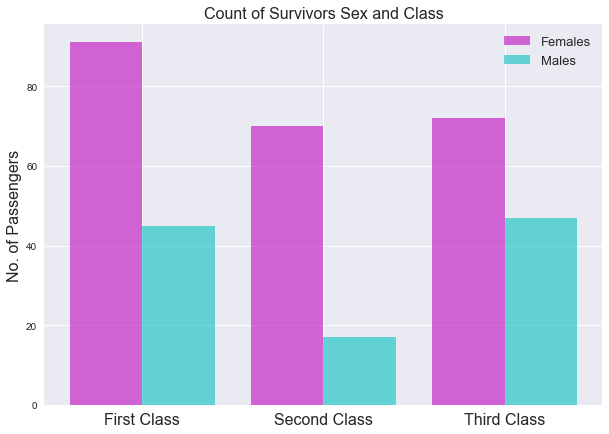

In [16]:
# Survived Passengers Data
survived_passenger = final_titanic_data[final_titanic_data['Survived'] == True]

#first class
first_class = survived_passenger[survived_passenger['Pclass'] == 'First']
fc_males = first_class[first_class['Sex'] == 'male']
fc_females = first_class[first_class['Sex'] == 'female']

#fsecond class
second_class = survived_passenger[survived_passenger['Pclass'] == 'Second']
sc_males = second_class[second_class['Sex'] == 'male']
sc_females = second_class[second_class['Sex'] == 'female']

#third class
third_class = survived_passenger[survived_passenger['Pclass'] == 'Third']
tc_males = third_class[third_class['Sex'] == 'male']
tc_females = third_class[third_class['Sex'] == 'female']

females = np.array([len(fc_females), len(sc_females), len(tc_females)])
males = np.array([len(fc_males), len(sc_males), len(tc_males)])

print('First Class')
print('Number of Survivors = {}'.format(len(first_class)))
print('Number of Female Survivors = {}, Percentage = {}%'.format(len(fc_females), round((len(fc_females)/len(first_class)*100), 2)))
print('Number of Male Survivors = {}, Percentage = {}%'.format(len(fc_males), round((len(fc_males)/len(first_class)*100), 2)))
print()
print('Second Class')
print('Number of Survivors = {}'.format(len(second_class)))
print('Number of Female Survivors = {}, Percentage = {}%'.format(len(sc_females), round((len(sc_females)/len(second_class)*100), 2)))
print('Number of Male Survivors = {}, Percentage = {}%'.format(len(sc_males), round((len(sc_males)/len(second_class)*100), 2)))
print()
print('Third Class')
print('Number of Survivors = {}'.format(len(third_class)))
print('Number of Female Survivors = {}, Percentage = {}%'.format(len(tc_females), round((len(tc_females)/len(third_class)*100), 2)))
print('Number of Male Survivors = {}, Percentage = {}%'.format(len(tc_males), round((len(tc_males)/len(third_class)*100), 2)))
print()

#Plotting

N = 3
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.bar(ind, females, width, color = 'm', alpha = 0.58)
plot2 = plt.bar(ind + width, males, width, color = 'c', alpha = 0.58)
ax.set_ylabel('No. of Passengers', fontsize = 16)
ax.set_title('Count of Survivors Sex and Class', fontsize = 16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('First Class', 'Second Class', 'Third Class'), fontsize = 16)
ax.legend((plot1[0], plot2[0]), ('Females', 'Males'), fontsize = 13)
plt.show()

## Observation
1. The Female Passenegrs were more in each Class than Males, who survived, this indicates Females were preferred over males.
2. The High rate of Males in Third Class, than Second Class, is questionable. One possible solution can be that the Passengers who survived in Third Class were not a direct part of the Rescue Mission.
3. The Male survivors from the Second Class is also questionable here with a very low number. It Indicates that Only the Females were preferred in the operation with Some males too only from the first class only, rest of the Male survivors, survived by other means and not by being the part of the rescue mission.

## Secondary Variables Analysis
> Here I analyse whether Passengers travelling alone had a better chance of survival or passengers travelling along Family
> Also I analyse if The City to which the Passengers belonged to, played a role in the Survival.

### Solo vs Passengers with Family on board

Stats

Number of Solo Passengers = 537
Passengers Survivers Grouping
Pclass
First     58
Second    36
Third     69
dtype: int64

Number of Passengers with Family= 354
Passengers Survivers Grouping
Pclass
First     78
Second    51
Third     50
dtype: int64


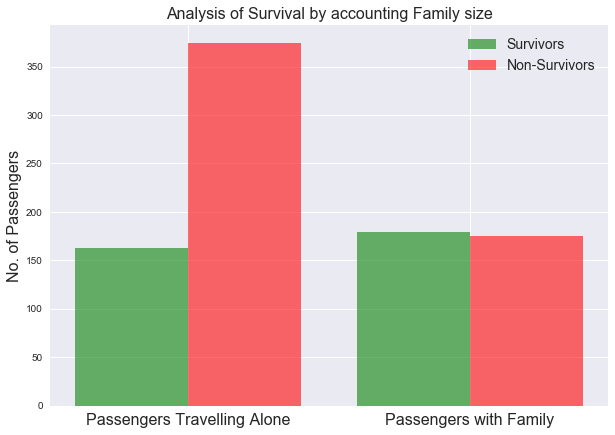

In [17]:
# Passengers Travelling Alone
solo_passengers = final_titanic_data[final_titanic_data['Family members'] < 1]
solo_passengers_survived = solo_passengers[solo_passengers['Survived'] == True]
solo_passengers_not_survived = solo_passengers[solo_passengers['Survived'] == False]

#Passengers Travelling along someone
non_solo_passengers = final_titanic_data[final_titanic_data['Family members'] >= 1]
non_solo_passengers_survived = non_solo_passengers[non_solo_passengers['Survived'] == True]
non_solo_passengers_not_survived = non_solo_passengers[non_solo_passengers['Survived'] == False]

survived = np.array([len(solo_passengers_survived),len(non_solo_passengers_survived)])
not_survived = np.array([len(solo_passengers_not_survived), len(non_solo_passengers_not_survived)])


print('Stats')
print()
print('Number of Solo Passengers = {}'.format(len(solo_passengers)))
print('Passengers Survivers Grouping')
print(solo_passengers_survived.groupby('Pclass').size())
print()
print('Number of Passengers with Family= {}'.format(len(non_solo_passengers)))
print('Passengers Survivers Grouping')
print(non_solo_passengers_survived.groupby('Pclass').size())


# Plotting the values
N = 2
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.bar(ind, survived, width, color = 'g', alpha = 0.58)
plot2 = plt.bar(ind + width, not_survived, width, color = 'r', alpha = 0.58)
ax.set_ylabel('No. of Passengers', fontsize = 16)
ax.set_title('Analysis of Survival by accounting Family size', fontsize = 16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Passengers Travelling Alone', 'Passengers with Family'), fontsize = 16)
ax.legend((plot1[0], plot2[0]), ('Survivors', 'Non-Survivors'), fontsize = 14)
plt.show()

## Observation
> The Stats shows that there's no direct relation between the Survivors who travelled alone or with Family.

### Embarkation Point analysis.

Southampton
Passenger Stats
Pclass
First     129
Second    164
Third     353
dtype: int64
Survivors Stats
Pclass
First     76
Second    76
Third     67
dtype: int64

Cherbourg
Passenger Stats
Pclass
First     85
Second    17
Third     66
dtype: int64
Survivors Stats
Pclass
First     59
Second     9
Third     25
dtype: int64

Queenstown
Passenger Stats
Pclass
First      2
Second     3
Third     72
dtype: int64
Survivors Stats
Pclass
First      1
Second     2
Third     27
dtype: int64



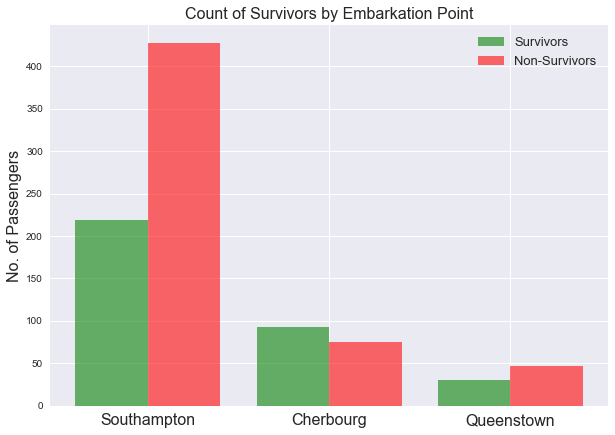

In [18]:
# Southampton Passengers
southampton_passengers = final_titanic_data[final_titanic_data['Embarked'] == 'Southampton']
southampton_survivors = southampton_passengers[southampton_passengers['Survived'] == True]
southampton_non_survivors = southampton_passengers[southampton_passengers['Survived'] == False]

# Cherbourg Passengers
cherbourg_passengers = final_titanic_data[final_titanic_data['Embarked'] == 'Cherbourg']
cherbourg_survivors = cherbourg_passengers[cherbourg_passengers['Survived'] == True]
cherbourg_non_survivors = cherbourg_passengers[cherbourg_passengers['Survived'] == False]

# Queenstown Passengers
queenstown_passengers = final_titanic_data[final_titanic_data['Embarked'] == 'Queenstown']
queenstown_survivors = queenstown_passengers[queenstown_passengers['Survived'] == True]
queenstown_non_survivors = queenstown_passengers[queenstown_passengers['Survived'] == False]

survivors = np.array([len(southampton_survivors), len(cherbourg_survivors), len(queenstown_survivors)])
non_survivors = np.array([len(southampton_non_survivors), len(cherbourg_non_survivors), len(queenstown_non_survivors)])

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    

print(color.BOLD + "Southampton" + color.END)
print(color.RED + 'Passenger Stats' + color.END)
print(southampton_passengers.groupby('Pclass').size())
print(color.RED + 'Survivors Stats'+ color.END)
print(southampton_survivors.groupby('Pclass').size())
print()
print(color.BOLD + "Cherbourg" + color.END)
print(color.RED + 'Passenger Stats' + color.END)
print(cherbourg_passengers.groupby('Pclass').size())
print(color.RED + 'Survivors Stats'+ color.END)
print(cherbourg_survivors.groupby('Pclass').size())
print()
print(color.BOLD + "Queenstown" + color.END)
print(color.RED + 'Passenger Stats' + color.END)
print(queenstown_passengers.groupby('Pclass').size())
print(color.RED + 'Survivors Stats'+ color.END)
print(queenstown_survivors.groupby('Pclass').size())
print()

# Plotting the values
N = 3
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(10,7))
plot1 = plt.bar(ind, survivors, width, color = 'g', alpha = 0.58)
plot2 = plt.bar(ind + width, non_survivors, width, color = 'r', alpha = 0.58)
ax.set_ylabel('No. of Passengers', fontsize = 16)
ax.set_title('Count of Survivors by Embarkation Point', fontsize = 16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Southampton', 'Cherbourg', 'Queenstown'), fontsize = 16)
ax.legend((plot1[0], plot2[0]), ('Survivors', 'Non-Survivors'), fontsize = 13)
plt.show()

## Observation
1. From the Stats it is observed that the Embarkation Point didn't play role in the Survival of the passenger.
2. Most of the passengers from Queenstown were from Third Class, therefore, the survivors from there were least.
3. Cherbourg had passengers in First Class, more than second and third class therefore it's survivors ratio is most of all three.
4. Southampton had most passengers out of all three.

# Conclusion
1. It is concluded from the analysis that the **Women** were preferred way more in the rescue operation over **Men**.
2. As the **Men** who survived were mostly of the **First Class** and **Third Class** shows that the **Passenger's Class** played a role in the survival as the number of Men from the **Second Class** were way too less in the number, and the **Men** who survived from the **Third Class** survived by other means and not by being a part of the rescue mission.
3. **Age** can not be concluded if it played role in the survival, as most of the survivors were either Children and Young Adults, which also were in more proportion aboard. The missing age data for many passenegers is also the key here as the average ages were filled, and the actual age may vary far from the substituted age.
4. The Secondary variables analysed don't show a direct relationship.
5. **The data set is also not complete here with only 891 entries, where as passengers onboard the TITANIC were in much greater number, therefore, the data could be unitentionally biased on either survivors or non-survivors side.**

# References
1. The formatting of text from print statement was obtained from github.
2. Matplotlib documentation for plotting the graphs.
3. Pylab Pandas documentation for commands in data wrangling.